In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
# Define the parameters
A = 4.5 # Amplitude of sine wave
f = 40 # Frequency of sine wave in Hz
Fs = 8000 # Sampling rate in Hz
t = np.arange(0, 0.05, 1/Fs) # Time vector for 50 ms duration

In [35]:
# Generate the continuous-time signal x(t)
x_t = A * np.sin(2 * np.pi * f * t)

In [36]:
# Quantization parameters
n_bits = 4 # Number of bits
V_max = 5 # Maximum of voltage
V_min = -5 # Minimum of volatage
quantization_levels = 2 ** n_bits # Number of quantization levels

In [37]:
# Step size of quantization (resolution)
delta = (V_max - V_min) / (quantization_levels)
delta

0.625

In [38]:
# Quantize the signal
x_q = np.round((x_t - V_min) / delta) * delta + V_min

In [39]:
# Ensure the values stay within the voltage range
x_q = np.clip(x_q, V_min, V_max)

In [40]:
# Calculate quantization noise
quantization_noise = x_t - x_q

In [41]:
# Singal power (mean squared value of the signal)
signal_power = np.mean(x_t**2)
signal_power

10.125

In [42]:
# Noise power (mean squared value of the quantization noise)
noise_power = np.mean(quantization_noise**2)
noise_power

0.028195248321820167

In [43]:
# Calculate SNR (Signal-to-Noise Ratio)
SNR = 10 * np.log10(signal_power/noise_power)
SNR

25.55219108017439

In [44]:
# Display the SNR result
print(f"Signal-to-Noise Ratio (SNR) due to quantizatioN: {SNR:.2F} dB")

Signal-to-Noise Ratio (SNR) due to quantizatioN: 25.55 dB


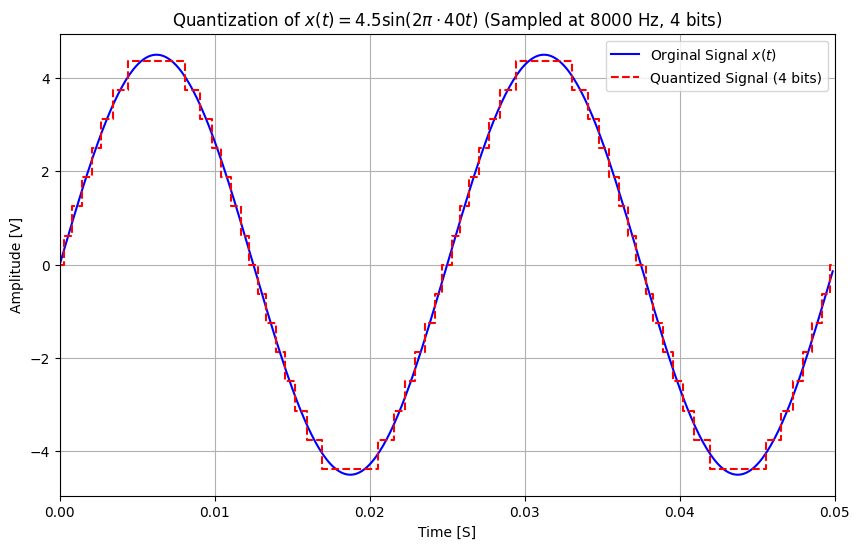

In [49]:
# Plot the original and quantized signal
plt.figure(figsize=(10,6))

# Original signal
plt.plot(t, x_t, label='Orginal Signal $x(t)$', linestyle ='-', color='blue')

# Quantizzed signal
plt.step(t, x_q, label='Quantized Signal (4 bits)', linestyle ='--', color='red', where='mid')

plt.xlabel('Time [S]')
plt.ylabel('Amplitude [V]')
plt.title('Quantization of $x(t)= 4.5\sin(2\pi \cdot 40 t)$ (Sampled at 8000 Hz, 4 bits)')
plt.xlim([0,0.05])
plt.legend()
plt.grid(True)
plt.show()
